**Importing Few Important Libraries and reading the DATASET**

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk',encoding='latin1')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DESCRIPTION: Predict cancer mortality rates for US counties.

**DATA DICTIONARY:**

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

In [ ]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


**Viewing the description of data**

In [ ]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,2.630000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


**Viewing the types of data in out DataFrame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

**Visualising few of the columns of the dataframe against the output columns**


*   avgDeathsPerYear
*   PctBachDeg25_Over
*   medIncome 



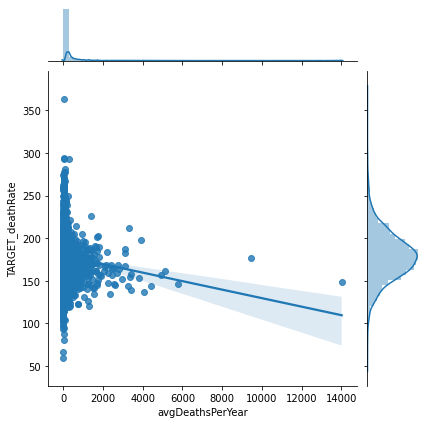

In [ ]:
sns.jointplot(x=df['avgDeathsPerYear'], y=df['TARGET_deathRate'], data=df, kind='reg')

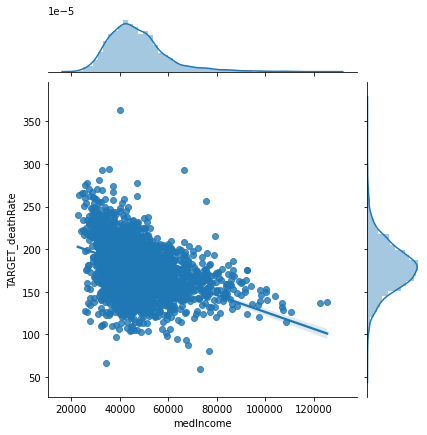

In [ ]:
sns.jointplot(x=df['medIncome'], y=df['TARGET_deathRate'], data=df, kind='reg')

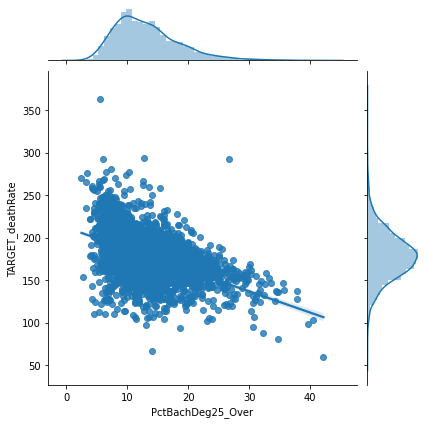

In [ ]:
sns.jointplot(x=df['PctBachDeg25_Over'], y=df['TARGET_deathRate'], data=df, kind='reg')

After some of the visualization, now I have viewed the missing values in the **Dataframe** 

In [ ]:
df.isna().sum()


avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

# **Handling the Missing Values**

Here in out data, I found that there are three columns where missing values are present i.e. **PctSomeCol18_24 ,PctPrivateCoverageAlone** and  **PctEmployed16_Over**.

Thus the columns **PctSomeCol18_24** was having 2285 missing values out of 3047 which can't be handled thus it was dropped directly and the rest two columns are filled with the help of *bfill* and *ffill* methods

**bfill()** :  is used to backward fill the missing values in the dataset. It will backward fill the NaN values that are present in the pandas dataframe.

**ffill()** : is used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.



In [ ]:
df["PctPrivateCoverageAlone"]=df["PctPrivateCoverageAlone"].fillna(method="bfill")
df["PctEmployed16_Over"]=(df["PctEmployed16_Over"].fillna(method="ffill"))
df=df.drop(["PctSomeCol18_24"],axis=1)

In [ ]:
df.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

# VISUALIZATION AND ANALYSIS

**BOX PLOTS**

The outliers can be directly seen with the help of boxplots.

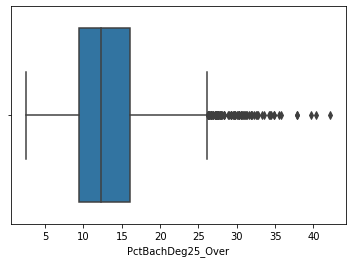

In [ ]:
sns.boxplot(df["PctBachDeg25_Over"])

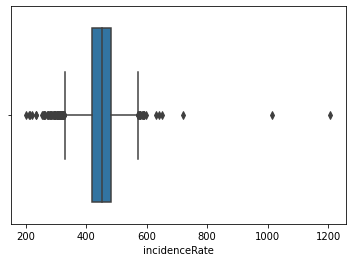

In [ ]:
sns.boxplot(df["incidenceRate"])  

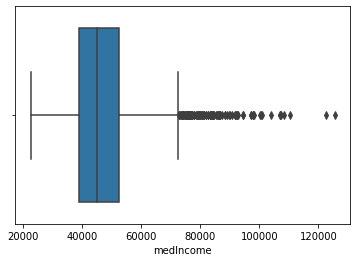

In [ ]:
sns.boxplot(df["medIncome"])

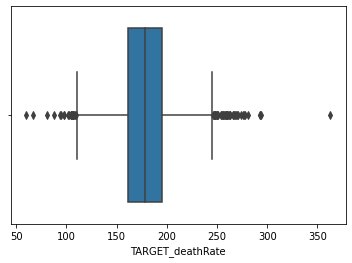

In [ ]:
sns.boxplot(df["TARGET_deathRate"])

**KDE PLOTS along with NORMALIZED KDE PLOTS**

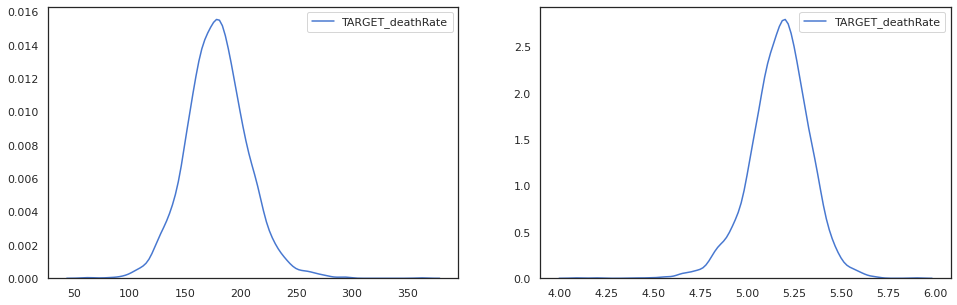

In [ ]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.kdeplot(df["TARGET_deathRate"])

plt.subplot(1,3,2)
sns.kdeplot(np.log(df["TARGET_deathRate"]))


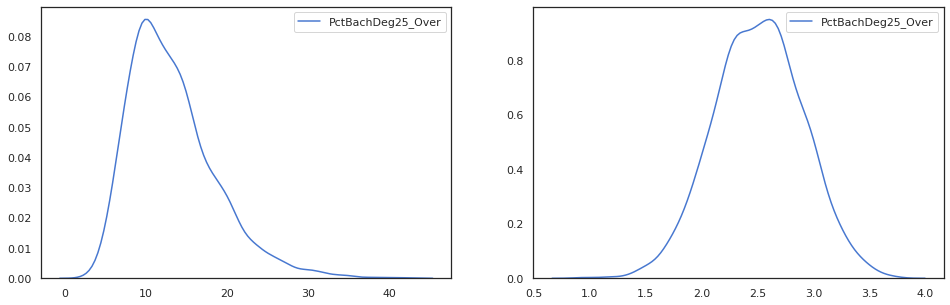

In [ ]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.kdeplot(df["PctBachDeg25_Over"])

plt.subplot(1,3,2)
sns.kdeplot(np.log(df["PctBachDeg25_Over"]))


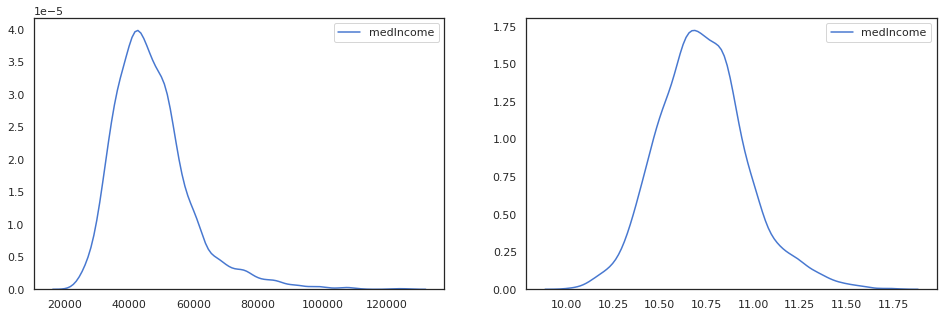

In [ ]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.kdeplot(df["medIncome"])

plt.subplot(1,3,2)
sns.kdeplot(np.log(df["medIncome"]))


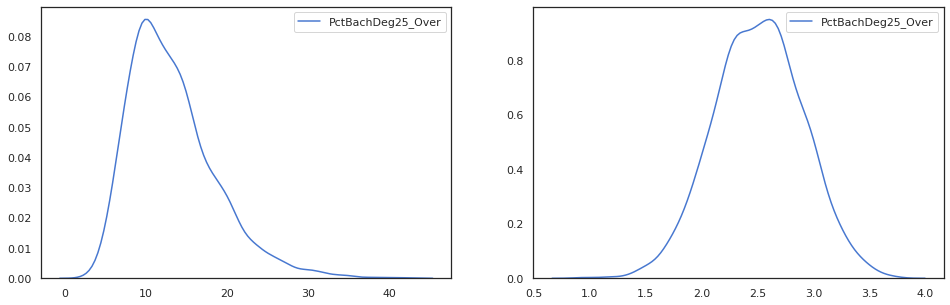

In [ ]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.kdeplot(df["PctBachDeg25_Over"])

plt.subplot(1,3,2)
sns.kdeplot(np.log(df["PctBachDeg25_Over"]))


# **HEAT MAP**

Heatmap is used to view the correlation among the various columns.
We See that there is not even a single columns which is having correlation above 0.5 with the output column or our target i.e. *TARGET_deathRate* 

PctEmployed16_Over        0.403575
PctPublicCoverage         0.404572
PctHS25_Over              0.404589
medIncome                 0.428615
povertyPercent            0.429389
PctPublicCoverageAlone    0.449358
incidenceRate             0.449432
PctBachDeg25_Over         0.485477
TARGET_deathRate          1.000000
Name: TARGET_deathRate, dtype: float64

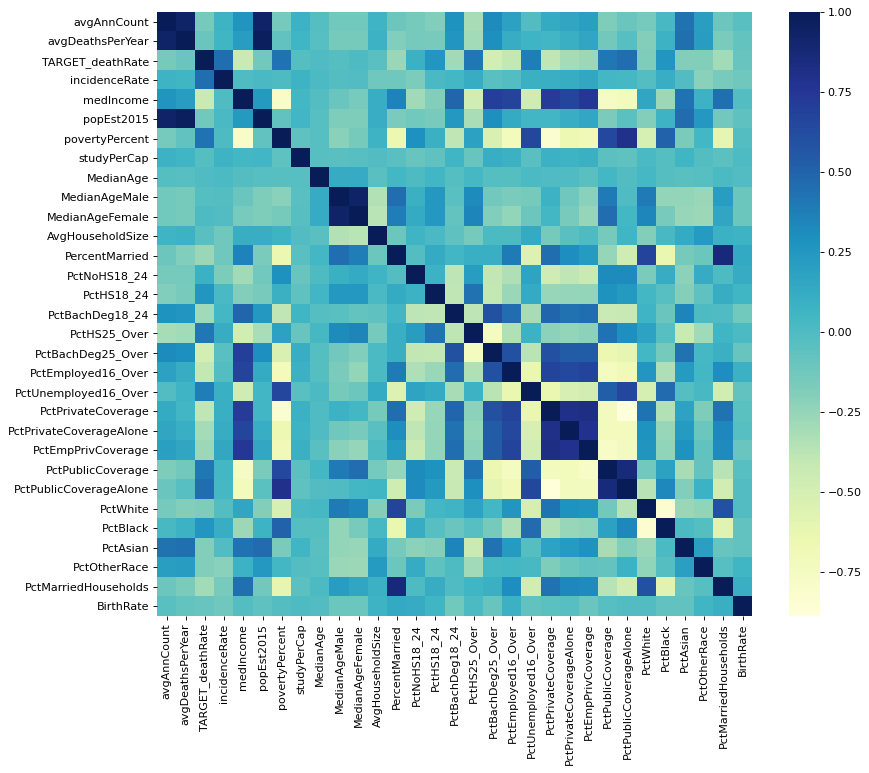

In [ ]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

corr= df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap="YlGnBu")

# Selecting only correlated features
corr_y = abs(corr['TARGET_deathRate'])
highest_corr = corr_y[corr_y >0.4]
highest_corr.sort_values(ascending=True)

## **Outliers Handling**

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

avgAnnCount                  442.000000
avgDeathsPerYear             121.000000
TARGET_deathRate              34.000000
incidenceRate                 60.550000
medIncome                  13609.500000
popEst2015                 56987.000000
povertyPercent                 8.250000
studyPerCap                   83.650776
MedianAge                      6.300000
MedianAgeMale                  6.150000
MedianAgeFemale                6.200000
AvgHouseholdSize               0.260000
PercentMarried                 8.650000
PctNoHS18_24                   9.900000
PctHS18_24                    11.500000
PctBachDeg18_24                5.100000
PctHS25_Over                   9.250000
PctBachDeg25_Over              6.700000
PctEmployed16_Over            11.700000
PctUnemployed16_Over           4.200000
PctPrivateCoverage            14.900000
PctPrivateCoverageAlone       14.700000
PctEmpPrivCoverage            13.200000
PctPublicCoverage             10.650000
PctPublicCoverageAlone         8.250000


# **NORMALISASTION followed by  TRANSFORMATION**

Few of the columns with numerical data are being *normalized* by taking **LOG** of them ; 

Few of the columns with numerical data are being *transformed* by taking **SQUARE** of them ; 

Few of the columns with numerical data are being *transformed* by taking **SQUAREROOT** of them ; 

In [ ]:
log_trans=["AvgHouseholdSize","povertyPercent","popEst2015","PctBachDeg25_Over","medIncome","incidenceRate","avgAnnCount","avgDeathsPerYear"]
square_trans=["PercentMarried","PctEmployed16_Over"]
sqrt_trans=Check_var=["PctBachDeg18_24","studyPerCap","popEst2015"]
for i in log_trans:
  df[i]=np.log(df[i])
for i in square_trans:
  df[i]=np.square(df[i])
for i in sqrt_trans:
  df[i]=np.sqrt(df[i])    

In [ ]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,7.242082,6.150603,164.9,6.193997,11.033243,3.531139,2.415914,22.355049,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",0.932164,2756.25,11.5,39.5,2.626785,23.2,2.975530,2693.61,8.0,75.1,53.8,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,5.153292,4.248495,161.3,6.020052,10.781599,3.267291,2.923162,4.807415,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",0.850151,1980.25,6.1,22.4,2.738613,26.0,3.122365,3124.81,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,4.624973,3.912023,174.7,5.857076,10.806653,3.154919,2.681022,6.896388,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",0.963174,2937.64,24.0,36.6,3.082207,29.0,2.772589,2106.81,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,6.056784,5.308268,194.8,6.064715,10.697452,3.352154,2.839078,18.510463,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",0.924259,2777.29,20.2,41.2,1.581139,31.6,2.230014,2332.89,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,4.043051,3.258097,144.4,5.858219,10.818878,3.040055,2.525729,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",0.850151,3340.84,14.9,43.0,1.414214,33.4,2.708050,2323.24,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# **FEATURE SCALING**

*Dropping the columns with object type data*

In [ ]:
df=df.drop(["Geography","binnedInc"],axis=1)
features=df.columns

Standardization by using StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features]= scaler.fit_transform(df[features])
'''
X = StandardScaler().fit_transform(features)

targets=(np.array(target)).reshape(-1,1)

Y = StandardScaler().fit_transform(targets)'''

'\nX = StandardScaler().fit_transform(features)\n\ntargets=(np.array(target)).reshape(-1,1)\n\nY = StandardScaler().fit_transform(targets)'

In [ ]:
target= df["TARGET_deathRate"]

In [ ]:
features=df.drop("TARGET_deathRate",axis=1)

# Model Building

**Splitting the data into Training and Testing**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor


X_Train, X_Test, Y_Train, Y_Test = train_test_split(features, target, test_size = 0.30, random_state = 101)

In [ ]:
print('Train - Predictors shape', X_Train.shape)
print('Test - Predictors shape', X_Test.shape)
print('Train - Target shape', Y_Train.shape)
print('Test - Target shape', Y_Test.shape)


Train - Predictors shape (2132, 30)
Test - Predictors shape (915, 30)
Train - Target shape (2132,)
Test - Target shape (915,)


**Fitting the Data into the Multi Linear Model**

In [ ]:
from sklearn.linear_model import LinearRegression
cls = LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(X_Train,Y_Train) 
prediction = cls.predict(X_Test)

**Checking the MSE AND MAE to predict how good the model has reduced the errors**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Square Error',mean_squared_error(prediction,Y_Test))
print('Mean Absolute Error',mean_absolute_error(prediction,Y_Test))


Mean Square Error 0.3141259239269917
Mean Absolute Error 0.38300712849956153


**Intercept, Coefficient and R2 values:**

In [ ]:
print('Co-efficient of multi-linear regression',cls.coef_)
print('Intercept of linear regression model',cls.intercept_)
print('Model R^2 Square value', metrics.r2_score(Y_Test, prediction))


Co-efficient of multi-linear regression [-2.03897135e-01  4.30598888e+00  2.16967254e-01  5.30786188e-02
 -4.38022694e+00 -7.76655183e-02 -3.37965829e-02 -1.98725349e-03
 -9.31427247e-02 -4.44676564e-01  9.21101128e-03 -3.09853904e-02
 -1.27646817e-02  1.15799674e-01 -1.44330266e-03 -8.53445143e-02
 -2.02590441e-01 -1.21105696e-01  7.81401648e-02 -1.04380571e-01
  1.51783466e-02  6.20783831e-02 -4.00373815e-01  3.01019106e-01
 -1.06361367e-01 -5.31357285e-02 -1.03186545e-01 -1.27208530e-01
  5.34021615e-02 -6.74554463e-02]
Intercept of linear regression model -0.006349169080184259
Model R^2 Square value 0.6913449522788087


# Residual plot

Text(0, 0.5, 'Residual')

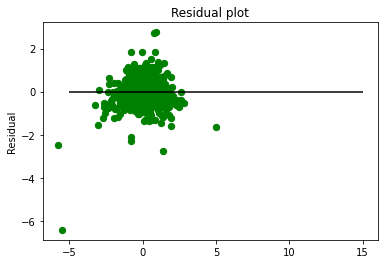

In [ ]:

plt.scatter(cls.predict(X_Test), cls.predict(X_Test) - Y_Test, c='g', s = 40)
plt.hlines(y=0, xmin=-5, xmax=15)
plt.title('Residual plot')
plt.ylabel('Residual')

#RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, 20)

RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe = rfe.fit(RFE_X_Train,Y_Train)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_Test))

Overall Accuracy using RFE:  0.6884743883040134


In [ ]:
model = LinearRegression()
rfe = RFE(model, 10)
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
model.fit(RFE_X_Train,Y_Train) 
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ")
colcheck = pd.Series(rfe.support_,index = list(features.columns))
colcheck[colcheck == True].index

Number of Features:  10
Selected Features: 


Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015',
       'MedianAgeFemale', 'PctHS18_24', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctPublicCoverage', 'PctPublicCoverageAlone'],
      dtype='object')

In [ ]:
#Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_Train, Y_Train)

rfe = RFE(lm,20)             # running RFE
rfe = rfe.fit(X_Train,Y_Train)

In [ ]:
list(zip(features.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', True, 1),
 ('popEst2015', True, 1),
 ('povertyPercent', True, 1),
 ('studyPerCap', False, 4),
 ('MedianAge', False, 10),
 ('MedianAgeMale', True, 1),
 ('MedianAgeFemale', True, 1),
 ('AvgHouseholdSize', False, 9),
 ('PercentMarried', False, 6),
 ('PctNoHS18_24', False, 8),
 ('PctHS18_24', True, 1),
 ('PctBachDeg18_24', False, 11),
 ('PctHS25_Over', True, 1),
 ('PctBachDeg25_Over', True, 1),
 ('PctEmployed16_Over', True, 1),
 ('PctUnemployed16_Over', True, 1),
 ('PctPrivateCoverage', True, 1),
 ('PctPrivateCoverageAlone', False, 7),
 ('PctEmpPrivCoverage', True, 1),
 ('PctPublicCoverage', True, 1),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', False, 2),
 ('PctBlack', False, 3),
 ('PctAsian', True, 1),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', False, 5),
 ('BirthRate', True, 1)]

In [ ]:
col = X_Train.columns[rfe.support_]
col

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale',
       'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctAsian',
       'PctOtherRace', 'BirthRate'],
      dtype='object')

In [ ]:
X_Train.columns[~rfe.support_]

Index(['studyPerCap', 'MedianAge', 'AvgHouseholdSize', 'PercentMarried',
       'PctNoHS18_24', 'PctBachDeg18_24', 'PctPrivateCoverageAlone',
       'PctWhite', 'PctBlack', 'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
X_train_rfe = X_Train[col]

In [ ]:
X_train_rfe

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,MedianAgeMale,MedianAgeFemale,PctHS18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctAsian,PctOtherRace,BirthRate
1909,1.131917,1.441426,-0.223743,-0.208981,1.453418,0.591320,-1.525451,-1.482493,-1.114006,-0.981644,0.434837,0.313300,-0.478710,-0.183643,0.339152,-0.644432,-0.219251,0.117344,0.527039,-0.379110
2571,0.483481,0.608066,0.675345,-0.434590,0.560331,0.280564,0.311813,0.293780,0.065937,-0.498262,0.256368,0.044930,-0.507680,0.079383,0.275634,0.210110,0.304306,-0.134849,-0.447463,-0.180435
2803,-1.875883,-1.848592,0.121612,0.273244,-2.074336,-0.141517,0.943373,1.370881,-0.187696,0.866582,-0.165514,1.353550,-2.014139,1.046946,0.497947,-0.453117,-0.562836,-0.480474,-0.479965,2.211086
1398,-0.648615,-0.823049,-1.406511,1.598572,-0.141050,-1.645544,0.043879,-0.310909,-0.518521,-2.033712,2.575917,0.007410,-1.116058,1.225428,0.550879,-2.187710,-1.495421,-0.082799,-0.017140,-0.767263
273,-0.972055,-0.892479,0.320848,-1.210930,-0.379798,1.896982,-3.286163,-3.750075,-1.907987,-1.735152,1.312978,-1.136462,0.274520,1.103309,1.196645,-1.715799,-0.988226,0.260829,-0.355598,-2.317401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,-0.168336,-0.091250,-0.244094,-0.751785,0.002777,0.963296,0.043879,0.161504,0.462927,-0.484045,0.601478,-0.368330,0.593193,-1.489383,-1.682839,0.720285,0.844224,-0.334605,-0.477172,0.880690
1599,0.779942,1.036620,0.906442,-0.586124,0.845804,0.820769,0.177846,0.237090,0.760670,1.435267,-0.810189,-0.496409,0.303490,-0.249400,0.190943,0.363162,0.549723,-0.299601,-0.426326,0.406445
1361,1.579976,-2.158045,0.154274,0.302110,-2.305428,-0.709545,0.732853,-0.632150,-1.411749,-0.270788,1.175629,0.796671,-0.710473,1.028158,-0.105474,-1.205624,-1.315449,-0.456451,-0.563960,1.356354
1547,-0.870181,-0.420026,-1.810773,-1.470562,-0.709331,1.009135,0.732853,0.728400,0.727587,0.624891,-0.955626,-1.085287,0.795986,-1.996648,-1.672252,1.358003,1.220530,-0.316641,-0.381605,-0.297056


In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(Y_Train,X_train_rfe).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     300.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:26:02   Log-Likelihood:                -1579.7
No. Observations:                2132   AIC:                             3201.
Df Residuals:                    2111   BIC:                             3320.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [ ]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [ ]:
X_train_new.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale',
       'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctAsian',
       'PctOtherRace', 'BirthRate'],
      dtype='object')

In [ ]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

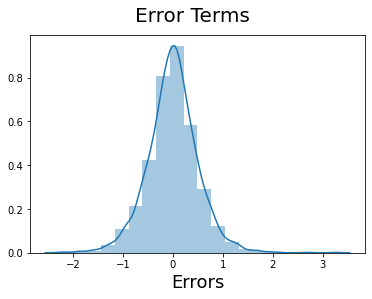

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(((Y_Train) - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        

In [ ]:
X_test=X_Test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test)
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

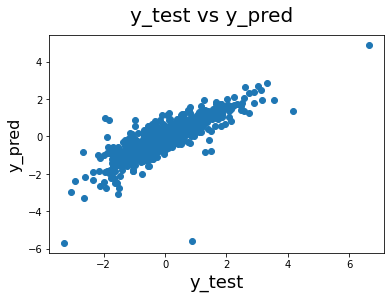

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_Test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,popEst2015,84.30
1,avgDeathsPerYear,75.88
15,PctPublicCoverage,22.85
16,PctPublicCoverageAlone,21.37
13,PctPrivateCoverage,14.35
5,povertyPercent,10.92
7,MedianAgeFemale,10.75
3,medIncome,10.32
6,MedianAgeMale,8.84
14,PctEmpPrivCoverage,7.42


In [ ]:
features=features[["medIncome","MedianAge","PctEmployed16_Over","avgAnnCount","PctBachDeg25_Over","PctUnemployed16_Over","PctAsian","incidenceRate","PctHS18_24","PctOtherRace"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(features,target, test_size = 0.30, random_state = 101)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_Train, Y_Train)
y_pred = regressor.predict(X_Test)

In [ ]:
regressor.feature_importances_

array([0.12155155, 0.05695926, 0.05100012, 0.05823518, 0.24641187,
       0.06096495, 0.04524709, 0.25371048, 0.05545993, 0.05045958])

In [ ]:
from sklearn import metrics
print('Mean Square Error', metrics.mean_squared_error(Y_Test,y_pred))
print('Model R^2 Square value', metrics.r2_score(Y_Test,y_pred))
y_train_price = regressor.predict(X_Train)

Mean Square Error 0.49769213371182697
Model R^2 Square value 0.5109757661485197


Text(0.5, 0, 'Errors')

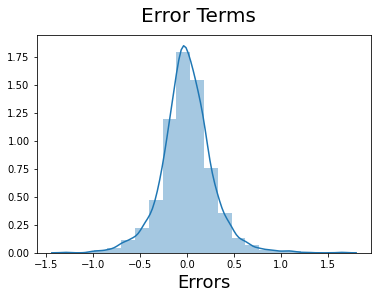

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(((Y_Train) - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Text(0, 0.5, 'y_pred')

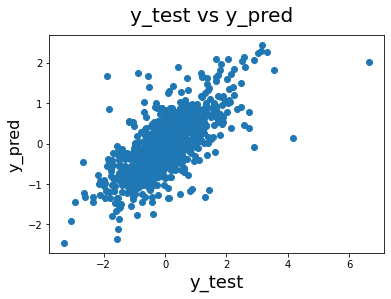

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_Test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,medIncome,2.93
2,PctEmployed16_Over,2.77
4,PctBachDeg25_Over,2.54
5,PctUnemployed16_Over,1.83
3,avgAnnCount,1.57
6,PctAsian,1.41
8,PctHS18_24,1.26
7,incidenceRate,1.21
9,PctOtherRace,1.13
1,MedianAge,1.01
